# 캐치한 이미지, 회전시키기

## 1. 배경을 최소화하고 특이점을 찾자. 
- 1) 가우시안blur로 노이즈를 제거, Canny로 테두리만 찾고, Canny의 kp를 찾아서 거리가 가장 긴 부분을 찾아보자.


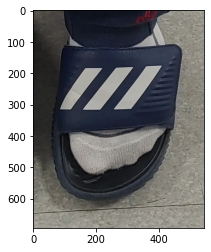

In [235]:
# 이미지 불러오기
import cv2 
import numpy as np
import matplotlib.pyplot as plt
img_orin = cv2.imread('data_new/obj_num_0.jpg')
img_orin = cv2.cvtColor(img_orin, cv2.COLOR_BGR2RGB)
plt.imshow(img_orin)

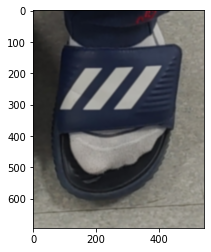

In [123]:
## GaussianBlur를 통한 이미지 노이즈 제거
img_gaus = cv2.GaussianBlur(img_orin, (13,13),0)
plt.imshow(img_gaus)

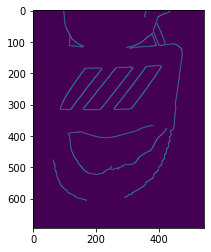

In [124]:
## Canny를 통한 테두리 찾기
img_canny = cv2.Canny(img_gaus,50, 120)

# thershold1, thershold2 값 ==> 50, 100일 때, 신발에 필요 없는 바닥 라인이 살아 있음
plt.imshow(img_canny)

In [125]:
# 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
kp_list = []
for i in range(img_canny.shape[0]):
    for j in range(img_canny.shape[1]):
          if img_canny[i][j]== 255:
                kp_list.append([i, j])
print(kp_list)

[[0, 3], [0, 98], [0, 360], [0, 436], [1, 3], [1, 98], [1, 360], [1, 436], [2, 3], [2, 4], [2, 98], [2, 360], [2, 436], [2, 437], [3, 0], [3, 1], [3, 2], [3, 3], [3, 98], [3, 360], [3, 435], [3, 436], [4, 2], [4, 98], [4, 360], [4, 434], [4, 435], [5, 98], [5, 359], [5, 433], [5, 434], [6, 98], [6, 359], [6, 431], [6, 432], [7, 98], [7, 358], [7, 430], [7, 431], [8, 98], [8, 358], [8, 428], [8, 429], [9, 98], [9, 358], [9, 425], [9, 426], [9, 427], [10, 98], [10, 357], [10, 421], [10, 422], [10, 423], [10, 424], [11, 98], [11, 357], [11, 417], [11, 418], [11, 419], [11, 420], [12, 98], [12, 357], [12, 415], [12, 416], [12, 417], [13, 98], [13, 356], [13, 413], [13, 414], [13, 415], [14, 99], [14, 356], [14, 411], [14, 412], [14, 413], [15, 99], [15, 356], [15, 410], [15, 411], [16, 99], [16, 356], [16, 408], [16, 409], [17, 99], [17, 355], [17, 405], [17, 406], [17, 407], [17, 408], [18, 99], [18, 355], [18, 403], [18, 404], [18, 405], [19, 99], [19, 355], [19, 402], [19, 403], [20, 99

In [126]:
# 두 점사이의 거리 구하는 공식
import math

def kp_dis(a_list, b_list) : 
    x_1, x_2 = a_list
    y_1, y_2 = b_list
    distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
    return distance

In [127]:
# 가장 거리가 먼 점을 찾아보자
max_dist = 0
max_pt = []
for i,kp in enumerate(kp_list) : 
    for j in range(i, len(kp_list)) : 
        dist = kp_dis(kp, kp_list[j])
        if dist > max_dist : 
            max_dist = dist
            max_pt = []
            max_pt.append(kp)
            max_pt.append(kp_list[j])

In [128]:
# 가장 거리가 먼 점, 거리
max_pt, max_dist

([[0, 436], [598, 141]], 666.8050689669358)

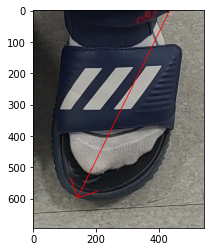

In [129]:
# 가장 먼 거리의 점을 그림에 표기해보자

im_arr = cv2.arrowedLine(img_orin, (436,0),(141,598), (255,0,0), 2)
 
plt.imshow(im_arr)

## 다른 이미지에도 적용이 될까?

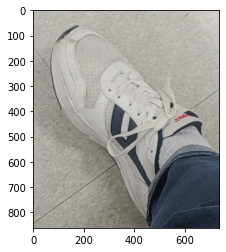

In [236]:
# 이미지 불러오기
import cv2 
import numpy as np
import matplotlib.pyplot as plt
img_orin = cv2.imread('data_new/obj_num_1.jpg')
img_orin = cv2.cvtColor(img_orin, cv2.COLOR_BGR2RGB)
plt.imshow(img_orin)

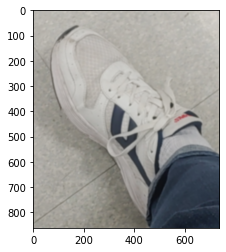

In [143]:
## GaussianBlur를 통한 이미지 노이즈 제거
img_gaus = cv2.GaussianBlur(img_orin, (13,13),0)
plt.imshow(img_gaus)

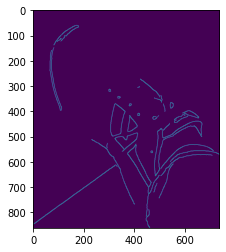

In [144]:
## Canny를 통한 테두리 찾기
img_canny = cv2.Canny(img_gaus,50, 120)

# thershold1, thershold2 값 ==> 50, 100일 때, 신발에 필요 없는 바닥 라인이 살아 있음
plt.imshow(img_canny)

In [145]:
# 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
kp_list = []
for i in range(img_canny.shape[0]):
    for j in range(img_canny.shape[1]):
          if img_canny[i][j]== 255:
                kp_list.append([i, j])
print(kp_list)

[[60, 170], [60, 171], [60, 172], [60, 173], [60, 174], [61, 166], [61, 167], [61, 168], [61, 169], [61, 175], [61, 176], [61, 177], [62, 163], [62, 164], [62, 165], [62, 177], [62, 178], [62, 179], [63, 161], [63, 162], [63, 163], [64, 159], [64, 160], [64, 161], [64, 179], [65, 157], [65, 158], [65, 159], [65, 179], [66, 155], [66, 156], [66, 157], [66, 178], [66, 179], [66, 180], [67, 154], [67, 155], [67, 177], [67, 178], [68, 152], [68, 153], [68, 154], [68, 175], [68, 176], [68, 177], [69, 151], [69, 152], [69, 173], [69, 174], [69, 175], [70, 149], [70, 150], [70, 170], [70, 171], [70, 172], [70, 173], [71, 147], [71, 148], [71, 149], [71, 167], [71, 168], [71, 169], [72, 145], [72, 146], [72, 147], [72, 166], [72, 167], [73, 143], [73, 144], [73, 145], [73, 165], [73, 166], [74, 142], [74, 143], [74, 163], [74, 164], [75, 140], [75, 141], [75, 142], [75, 161], [75, 162], [75, 163], [76, 139], [76, 140], [76, 160], [76, 161], [77, 137], [77, 138], [77, 158], [77, 159], [77, 160]

In [146]:
# 두 점사이의 거리 구하는 공식
import math

def kp_dis(a_list, b_list) : 
    x_1, x_2 = a_list
    y_1, y_2 = b_list
    distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
    return distance

In [147]:
# 가장 거리가 먼 점을 찾아보자
max_dist = 0
max_pt = []
for i,kp in enumerate(kp_list) : 
    for j in range(i, len(kp_list)) : 
        dist = kp_dis(kp, kp_list[j])
        if dist > max_dist : 
            max_dist = dist
            max_pt = []
            max_pt.append(kp)
            max_pt.append(kp_list[j])

In [148]:
# 가장 거리가 먼 점, 거리
max_pt, max_dist

([[62, 163], [861, 460]], 852.4142185580905)

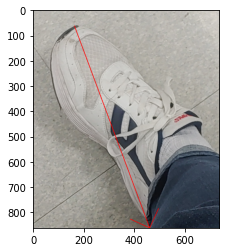

In [149]:
# 가장 먼 거리의 점을 그림에 표기해보자

im_arr = cv2.arrowedLine(img_orin, (163,62),(460, 861), (255,0,0), 2)
 
plt.imshow(im_arr)

In [140]:
img_orin.shape

(862, 738, 3)

## 함수 만들어보자



In [307]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def find_want_arr (img) :
    img_orin = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ## GaussianBlur를 통한 이미지 노이즈 제거
    img_gaus = cv2.GaussianBlur(img_orin, (13,13),0)

    ## Canny를 통한 테두리 찾기
    img_canny = cv2.Canny(img_gaus,50, 120)
    
    # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
    kp_list = []
    for i in range(img_canny.shape[0]):
        for j in range(img_canny.shape[1]):
              if img_canny[i][j]== 255:
                    kp_list.append([i, j])
    max_dist = 0
    max_pt = []
    
    for i,kp in enumerate(kp_list) : 
        for j in range(i, len(kp_list)) : 
            dist = kp_dis(kp, kp_list[j])
            if dist > max_dist : 
                max_dist = dist
                max_pt = []
                max_pt.append(kp)
                max_pt.append(kp_list[j])
                
    x_1, y_1 = max_pt[0]
    x_2, y_2 = max_pt[1]
    x_3, y_3 = x_2, img.shape[1]
        
    im_arr = cv2.arrowedLine(img_orin, (y_1,x_1), (y_2, x_2), (255,0,0), 2)
    im_arr = cv2.arrowedLine(im_arr, (y_2, x_2), (y_3, x_3),(255,0,0), 2)
    print(max_pt[0], max_pt[1])

    plt.imshow(im_arr)

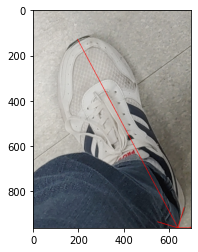

In [252]:
img_shoes = cv2.imread('data_new/obj_num_2.jpg')
find_want_arr(img_shoes)

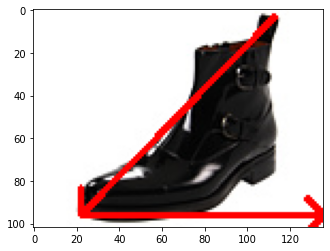

In [253]:
img_shoes = cv2.imread('data_new/boots3.jpg')
find_want_arr(img_shoes)

In [306]:
## 각 구하기
def find_angle ( img, list_1, list_2):
    x_1, y_1 = list_1 # 첫번 째 점
    x_2, y_2 = list_2 # 중앙에 있는 점
    
    # 마지막 점 생성하기
    x_3, y_3 = x_2, img.shape[1]
    
    line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
    line_2 = y_3 - y_2
    
    angle = float(np.rad2deg(np.arccos(line_2/line_1)))
    if x_2 - x_1> 0:
        angle = 180 - angle
    
    return angle
    
    

In [286]:
max_pt= [[62, 163], [861, 400]]
a, b =  max_pt[0], max_pt[1]
x_1, y_1 = a # 첫번 째 점
x_2, y_2 = b
x_3, y_3 = x_2, img_orin.shape[1]

In [290]:
type(x_1), type(y_3) 

(int, int)

In [294]:
line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
line_2 = y_3 - y_2

type(np.arccos(line_2/line_1))



numpy.float64

In [295]:
type(np.rad2deg((np.arccos(line_2/line_1))))

numpy.float64

In [298]:
angle = (np.rad2deg(np.arccos(line_2/line_1)))
type(angle)

numpy.float64

In [299]:
if x_2 - x_1> 0:
    angle = 180 - angle

print(angle)

113.92643365986022


In [300]:
type(angle)

numpy.float64

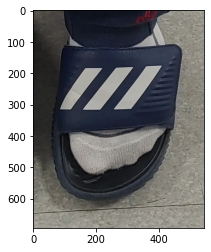

In [302]:
# 이미지 불러오기
import cv2 
import numpy as np
import matplotlib.pyplot as plt
img_orin = cv2.imread('data_new/obj_num_0.jpg')
img_orin = cv2.cvtColor(img_orin, cv2.COLOR_BGR2RGB)
plt.imshow(img_orin)

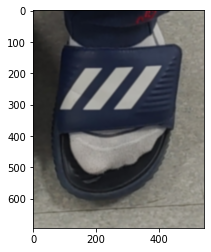

In [122]:
# 노이즈 제거 (Gaussianblur)
img_a = cv2.GaussianBlur(img_s, (13,13), 0)
plt.imshow(img_1)

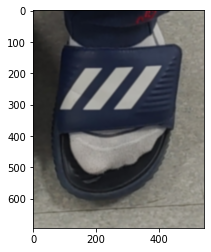

In [123]:
## GaussianBlur를 통한 이미지 노이즈 제거
img_gaus = cv2.GaussianBlur(img_orin, (13,13),0)
plt.imshow(img_gaus)

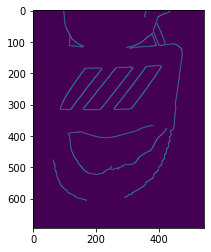

In [124]:
## Canny를 통한 테두리 찾기
img_canny = cv2.Canny(img_gaus,50, 120)

# thershold1, thershold2 값 ==> 50, 100일 때, 신발에 필요 없는 바닥 라인이 살아 있음
plt.imshow(img_canny)

In [125]:
# 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
kp_list = []
for i in range(img_canny.shape[0]):
    for j in range(img_canny.shape[1]):
          if img_canny[i][j]== 255:
                kp_list.append([i, j])
print(kp_list)

[[0, 3], [0, 98], [0, 360], [0, 436], [1, 3], [1, 98], [1, 360], [1, 436], [2, 3], [2, 4], [2, 98], [2, 360], [2, 436], [2, 437], [3, 0], [3, 1], [3, 2], [3, 3], [3, 98], [3, 360], [3, 435], [3, 436], [4, 2], [4, 98], [4, 360], [4, 434], [4, 435], [5, 98], [5, 359], [5, 433], [5, 434], [6, 98], [6, 359], [6, 431], [6, 432], [7, 98], [7, 358], [7, 430], [7, 431], [8, 98], [8, 358], [8, 428], [8, 429], [9, 98], [9, 358], [9, 425], [9, 426], [9, 427], [10, 98], [10, 357], [10, 421], [10, 422], [10, 423], [10, 424], [11, 98], [11, 357], [11, 417], [11, 418], [11, 419], [11, 420], [12, 98], [12, 357], [12, 415], [12, 416], [12, 417], [13, 98], [13, 356], [13, 413], [13, 414], [13, 415], [14, 99], [14, 356], [14, 411], [14, 412], [14, 413], [15, 99], [15, 356], [15, 410], [15, 411], [16, 99], [16, 356], [16, 408], [16, 409], [17, 99], [17, 355], [17, 405], [17, 406], [17, 407], [17, 408], [18, 99], [18, 355], [18, 403], [18, 404], [18, 405], [19, 99], [19, 355], [19, 402], [19, 403], [20, 99

In [126]:
# 두 점사이의 거리 구하는 공식
import math

def kp_dis(a_list, b_list) : 
    x_1, x_2 = a_list
    y_1, y_2 = b_list
    distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
    return distance

In [127]:
# 가장 거리가 먼 점을 찾아보자
max_dist = 0
max_pt = []
for i,kp in enumerate(kp_list) : 
    for j in range(i, len(kp_list)) : 
        dist = kp_dis(kp, kp_list[j])
        if dist > max_dist : 
            max_dist = dist
            max_pt = []
            max_pt.append(kp)
            max_pt.append(kp_list[j])

In [128]:
# 가장 거리가 먼 점, 거리
max_pt, max_dist

([[0, 436], [598, 141]], 666.8050689669358)

In [297]:
angle

113.92643365986022

In [282]:
angle = (find_angle(img_orin, a, b))

113.92643365986022


In [283]:
type(angle)

NoneType

In [269]:
type(60)

int

[62, 163] [861, 460]


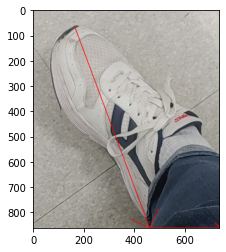

In [308]:
img_shoes = cv2.imread('data_new/obj_num_1.jpg')
find_want_arr(img_shoes)

In [263]:
rot_img = cv2.getRotationMatrix2D((399, 148), int(180-angle), 1)

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [304]:
def find_angle ( img, list_1, list_2):
    x_1, y_1 = list_1 # 첫번 째 점
    x_2, y_2 = list_2 # 중앙에 있는 점
    
    # 마지막 점 생성하기
    x_3, y_3 = x_2, img.shape[1]
    
    line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
    line_2 = y_3 - y_2
    
    angle = float(np.rad2deg(np.arccos(line_2/line_1)))
    if x_2 - x_1> 0:
        angle = 180 - angle
    
    return angle

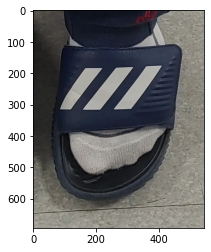

In [121]:
# 이미지 불러오기
import cv2 
import numpy as np
import matplotlib.pyplot as plt
img_orin = cv2.imread('data_new/obj_num_0.jpg')
img_orin = cv2.cvtColor(img_orin, cv2.COLOR_BGR2RGB)
plt.imshow(img_orin)

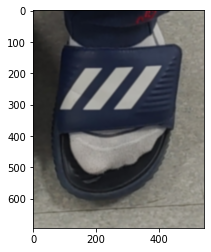

In [122]:
# 노이즈 제거 (Gaussianblur)
img_a = cv2.GaussianBlur(img_s, (13,13), 0)
plt.imshow(img_1)

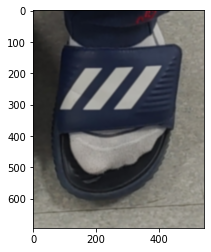

In [123]:
## GaussianBlur를 통한 이미지 노이즈 제거
img_gaus = cv2.GaussianBlur(img_orin, (13,13),0)
plt.imshow(img_gaus)

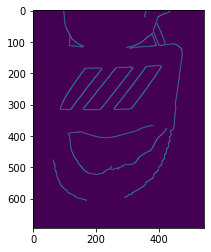

In [124]:
## Canny를 통한 테두리 찾기
img_canny = cv2.Canny(img_gaus,50, 120)

# thershold1, thershold2 값 ==> 50, 100일 때, 신발에 필요 없는 바닥 라인이 살아 있음
plt.imshow(img_canny)

In [125]:
# 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
kp_list = []
for i in range(img_canny.shape[0]):
    for j in range(img_canny.shape[1]):
          if img_canny[i][j]== 255:
                kp_list.append([i, j])
print(kp_list)

[[0, 3], [0, 98], [0, 360], [0, 436], [1, 3], [1, 98], [1, 360], [1, 436], [2, 3], [2, 4], [2, 98], [2, 360], [2, 436], [2, 437], [3, 0], [3, 1], [3, 2], [3, 3], [3, 98], [3, 360], [3, 435], [3, 436], [4, 2], [4, 98], [4, 360], [4, 434], [4, 435], [5, 98], [5, 359], [5, 433], [5, 434], [6, 98], [6, 359], [6, 431], [6, 432], [7, 98], [7, 358], [7, 430], [7, 431], [8, 98], [8, 358], [8, 428], [8, 429], [9, 98], [9, 358], [9, 425], [9, 426], [9, 427], [10, 98], [10, 357], [10, 421], [10, 422], [10, 423], [10, 424], [11, 98], [11, 357], [11, 417], [11, 418], [11, 419], [11, 420], [12, 98], [12, 357], [12, 415], [12, 416], [12, 417], [13, 98], [13, 356], [13, 413], [13, 414], [13, 415], [14, 99], [14, 356], [14, 411], [14, 412], [14, 413], [15, 99], [15, 356], [15, 410], [15, 411], [16, 99], [16, 356], [16, 408], [16, 409], [17, 99], [17, 355], [17, 405], [17, 406], [17, 407], [17, 408], [18, 99], [18, 355], [18, 403], [18, 404], [18, 405], [19, 99], [19, 355], [19, 402], [19, 403], [20, 99

In [126]:
# 두 점사이의 거리 구하는 공식
import math

def kp_dis(a_list, b_list) : 
    x_1, x_2 = a_list
    y_1, y_2 = b_list
    distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
    return distance

In [127]:
# 가장 거리가 먼 점을 찾아보자
max_dist = 0
max_pt = []
for i,kp in enumerate(kp_list) : 
    for j in range(i, len(kp_list)) : 
        dist = kp_dis(kp, kp_list[j])
        if dist > max_dist : 
            max_dist = dist
            max_pt = []
            max_pt.append(kp)
            max_pt.append(kp_list[j])

In [128]:
# 가장 거리가 먼 점, 거리
max_pt, max_dist

([[0, 436], [598, 141]], 666.8050689669358)

In [309]:
b =  find_angle(img_shoes, [436, 0], [141,598])

In [312]:
b

77.88020209126111

In [315]:
c,d = 147.5, 299

In [316]:
new_im= cv2.getRotationMatrix2D((c,d), b, 1.0)
print(new_im)

[[ 2.09956412e-01  9.77710747e-01 -1.75804084e+02]
 [-9.77710747e-01  2.09956412e-01  3.80435368e+02]]


In [320]:
w, h = img_shoes.shape[1], img_shoes.shape[0]
output_size = (w,h)
rotated_flower = cv2.warpAffine(img_shoes,new_im,output_size)

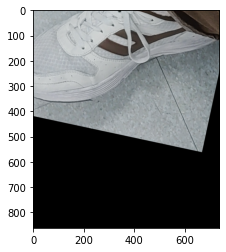

In [321]:
plt.imshow(rotated_flower)

## 함수 합치기

In [16]:
# 이미지 돌리기 전 까지의 코드
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def find_want_arr (img) :
    img_orin = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ## GaussianBlur를 통한 이미지 노이즈 제거
    img_gaus = cv2.GaussianBlur(img_orin, (13,13),0)

    ## Canny를 통한 테두리 찾기
    img_canny = cv2.Canny(img_gaus,50, 120)
    
    # 값이 255인, canny를 통해 출력된 테두리 값을 저장하기
    kp_list = []
    for i in range(img_canny.shape[0]):
        for j in range(img_canny.shape[1]):
              if img_canny[i][j]== 255:
                    kp_list.append([i, j])
    max_dist = 0
    max_pt = []
    
    for i,kp in enumerate(kp_list) : 
        for j in range(i, len(kp_list)) : 
            dist = kp_dis(kp, kp_list[j])
            if dist > max_dist : 
                max_dist = dist
                max_pt = []
                max_pt.append(kp)
                max_pt.append(kp_list[j])
                
    x_1, y_1 = max_pt[0]
    x_2, y_2 = max_pt[1]
    x_3, y_3 = x_2, img.shape[1]
        
    im_arr = cv2.arrowedLine(img_orin, (y_1,x_1), (y_2, x_2), (255,0,0), 2)
    im_arr = cv2.arrowedLine(im_arr, (y_2, x_2), (y_3, x_3),(255,0,0), 2)
    print(max_pt[0], max_pt[1])

    plt.imshow(im_arr)
    
# 두 점사이의 거리 구하는 공식
import math

def kp_dis(a_list, b_list) : 
    x_1, x_2 = a_list
    y_1, y_2 = b_list
    distance = (math.sqrt((x_1 - y_1)**2 +(x_2 - y_2)**2))
    
    return distance

def find_angle ( img, list_1, list_2):
    x_1, y_1 = list_1 # 첫번 째 점
    x_2, y_2 = list_2 # 중앙에 있는 점
    
    # 마지막 점 생성하기
    x_3, y_3 = x_2, img.shape[1]
    
    line_1 = math.sqrt((x_2 - x_1)**2 +(y_2 - y_1)**2)
    line_2 = y_3 - y_2
    
    angle = float(np.rad2deg(np.arccos(line_2/line_1)))
    if x_2 - x_1> 0:
        angle = 180 - angle
    
    return angle

In [9]:
a = find_angle(img, [0,584],[234,209])

C:\Users\USER\anaconda3\envs\main\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in arccos


In [1]:
from rotated_img import rotated_img

In [2]:
import cv2
import matplotlib.pyplot as plt

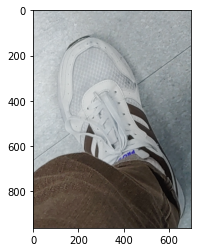

In [3]:
img = cv2.imread('data_new/obj_num_2.jpg')
plt.imshow(img)

In [4]:
a = rotated_img(img)

[128, 196] [960, 640]


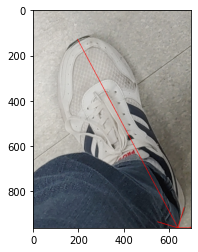

In [6]:
a.find_want_arr()

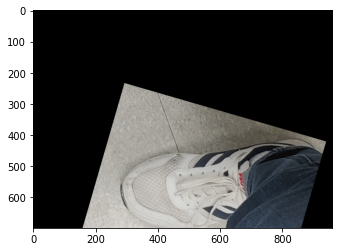

In [5]:
a.rotated()

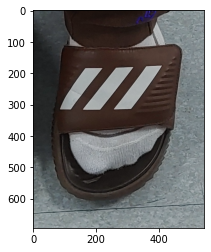

In [6]:
img = cv2.imread('data_new/obj_num_0.jpg')
plt.imshow(img)

In [12]:
cv2.imwrite('data_new/test_img.jpg', cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

True

In [7]:
a = rotated_img(img)

In [8]:
a.find_want_arr()

KeyboardInterrupt: 

In [ ]:
find_angle(img, [0, 436], [598, 141])

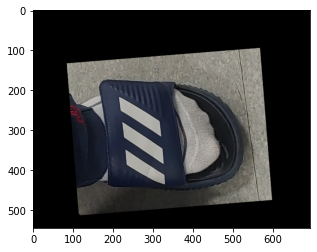

In [9]:
b = a.rotated()